In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data= pd.read_csv(r"C:\Users\Mohammed Zaid\Downloads\ab_data.csv") 
print("Data Shape:", data.shape)
print("\nColumns:\n", data.columns)
print("\nMissing Values:\n", data.isnull().sum())

Data Shape: (294478, 5)

Columns:
 Index(['user_id', 'timestamp', 'group', 'landing_page', 'converted'], dtype='object')

Missing Values:
 user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64


In [5]:
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)

In [6]:
print("\nUnique Groups:", data['group'].unique())
print("Unique Landing Pages:", data['landing_page'].unique())
print("Conversion Rate by Group:\n", data.groupby('group')['converted'].mean())


Unique Groups: ['control' 'treatment']
Unique Landing Pages: ['old_page' 'new_page']
Conversion Rate by Group:
 group
control      0.120399
treatment    0.118920
Name: converted, dtype: float64


In [9]:
control_converted = data.query("group == 'control'")['converted']
treatment_converted = data.query("group == 'treatment'")['converted']

successes = [control_converted.sum(), treatment_converted.sum()]
samples = [control_converted.count(), treatment_converted.count()]

In [10]:
z_stat, p_value = proportions_ztest(successes, samples)
print(f"\nZ-statistic = {z_stat:.3f}")
print(f"P-value = {p_value:.4f}")


Z-statistic = 1.237
P-value = 0.2161


In [11]:
alpha = 0.05
if p_value < alpha:
    print(" Reject the Null Hypothesis – There is a significant difference in conversion rates.")
else:
    print(" Fail to Reject the Null Hypothesis – No significant difference found.")

 Fail to Reject the Null Hypothesis – No significant difference found.


C:\Users\Mohammed Zaid\AppData\Local\Temp\ipykernel_24372\3895011775.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='group', y='converted', data=conv_rate, palette='Set2')


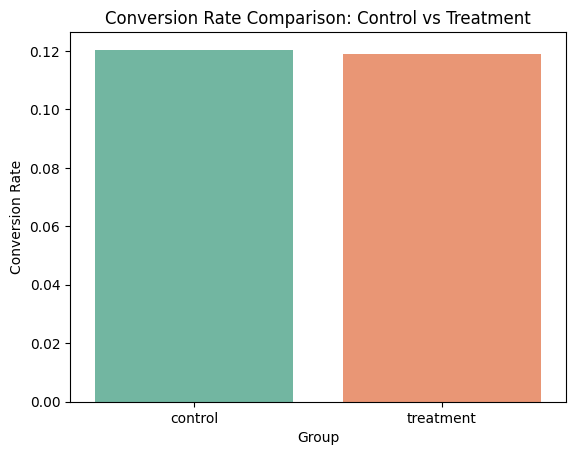

In [12]:
conv_rate = data.groupby('group')['converted'].mean().reset_index()

sns.barplot(x='group', y='converted', data=conv_rate, palette='Set2')
plt.title('Conversion Rate Comparison: Control vs Treatment')
plt.ylabel('Conversion Rate')
plt.xlabel('Group')
plt.show()

T-Test

In [13]:
df['session_duration'] = np.random.normal(300, 50, size=len(df))

control_dur = df.query("group == 'control'")['session_duration']
treat_dur = df.query("group == 'treatment'")['session_duration']

from scipy import stats
t_stat, p_val_t = stats.ttest_ind(control_dur, treat_dur)
print(f"T-statistic = {t_stat:.3f}, P-value = {p_val_t:.4f}")

T-statistic = -0.767, P-value = 0.4431
